# Loading the CIFAR10 dataset

In [1]:
import torch
import numpy as np
import random

def set_seed(seed=42):
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    np.random.seed(seed)
    random.seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False


In [2]:
set_seed(42)

In [3]:
from utils.dataset_loader import cifar10_dataset, cifar10_dataloader
import torchvision, torch
import matplotlib.pyplot as plt
import numpy as np

train_dataset, test_dataset = cifar10_dataset()
train_dataloader, test_dataloader, val_dataloader = cifar10_dataloader(train_dataset, test_dataset, batch_size=64)

classes = train_dataset.classes
print(classes)  # ['airplane', 'automobile', 'bird', 'cat', ..., 'truck']

Files already downloaded and verified
Files already downloaded and verified
['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [4]:
def imgshow(img):
    img = img/2 + 0.5 #undo normalization
    img_np = img.numpy() #for imshow
    
    plt.imshow(np.transpose(img_np, (1, 2, 0)))
    #plt.title(classes[lbl])
    plt.axis('off')
    plt.show()


In [5]:
dataiter = iter(train_dataloader)
images, labels = next(dataiter)

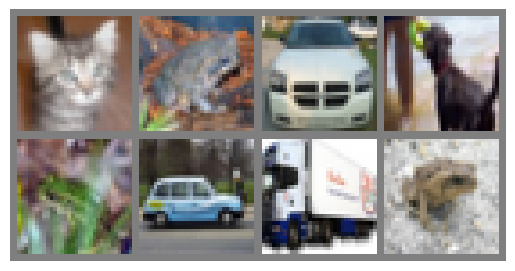

Labels:  ['cat', 'frog', 'automobile', 'dog', 'frog', 'automobile', 'truck', 'frog']


In [6]:
imgshow(torchvision.utils.make_grid(images[:8], nrow=4))
print('Labels: ', [classes[i] for i in labels[:8]])

In [7]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

## Checking the class distribution of the dataset

frog: 5000 samples
truck: 5000 samples
deer: 5000 samples
automobile: 5000 samples
bird: 5000 samples
horse: 5000 samples
ship: 5000 samples
cat: 5000 samples
dog: 5000 samples
airplane: 5000 samples


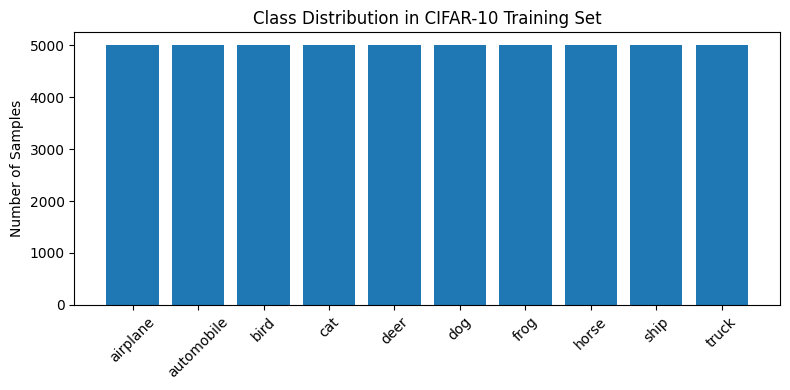

In [8]:
from collections import Counter

targets = train_dataset.targets  # list of class indices
counter = Counter(targets)

for i, count in counter.items():
    print(f"{classes[i]}: {count} samples")


plt.figure(figsize=(8, 4))
plt.bar(classes, [counter[i] for i in range(len(classes))])
plt.xticks(rotation=45)
plt.ylabel("Number of Samples")
plt.title("Class Distribution in CIFAR-10 Training Set")
plt.tight_layout()
plt.show()

There is no class imbalance in the CIFAR dataset.

## Training a classical CNN architecture: LeNet-5

In [9]:
from utils.model_architecture import LeNet
from utils.train import train_model

model = LeNet().to(device)
model = train_model(model, train_dataloader, val=val_dataloader, num_epochs=20, lr=1e-3)

e:\CNN-block-lab\cnnenv\lib\site-packages\torch\optim\lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Current LR: 0.001000
Epoch [1/20] - Train Loss: 1.7631, Train Acc: 37.21% - Val Loss: 1.6006, Val Acc: 42.72%
Current LR: 0.001000
Epoch [2/20] - Train Loss: 1.5057, Train Acc: 46.16% - Val Loss: 1.4675, Val Acc: 47.72%
Current LR: 0.001000
Epoch [3/20] - Train Loss: 1.3699, Train Acc: 50.95% - Val Loss: 1.3723, Val Acc: 50.34%
Current LR: 0.001000
Epoch [4/20] - Train Loss: 1.2768, Train Acc: 54.27% - Val Loss: 1.3146, Val Acc: 53.04%
Current LR: 0.001000
Epoch [5/20] - Train Loss: 1.2154, Train Acc: 56.42% - Val Loss: 1.3031, Val Acc: 53.22%
Current LR: 0.001000
Epoch [6/20] - Train Loss: 1.1666, Train Acc: 58.61% - Val Loss: 1.3077, Val Acc: 53.72%
Current LR: 0.001000
Epoch [7/20] - Train Loss: 1.1254, Train Acc: 59.92% - Val Loss: 1.3163, Val Acc: 53.26%
Current LR: 0.001000
Epoch [8/20] - Train Loss: 1.0932, Train Acc: 61.09% - Val Loss: 1.2751, Val Acc: 55.20%
Current LR: 0.001000
Epoch [9/20] - Train Loss: 1.0584, Train Acc: 62.20% - Val Loss: 1.2873, Val Acc: 55.60%
Current LR

From epoch 16 to 17, the validation accuracy increased even though the loss did not go down. The validation loss (Cross Entropy Loss) measures the model's confidence. The model's accuracy might be 100% (just checks if prediction is correct or not) but the loss will penalize correct predictions with low confidence, and low confident wrong answers even heavily.

In [10]:
import torchvision.utils as vutils

# Normalize to 0-1 for visualization
filters = model.conv1.weight.data.clone().cpu()
filters = (filters - filters.min()) / (filters.max() - filters.min())

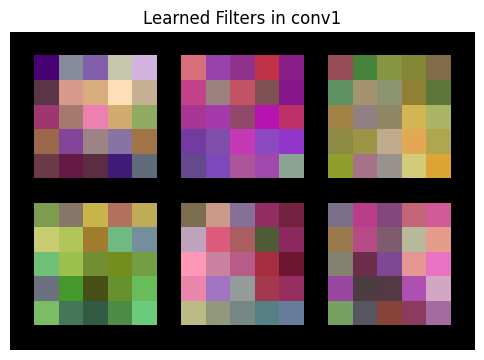

In [11]:
# Create a grid of filters
filter_grid = vutils.make_grid(filters, nrow=3, padding=1)

# Plot
plt.figure(figsize=(6, 6))
plt.imshow(filter_grid.permute(1, 2, 0))  # Convert from [C, H, W] to [H, W, C] for plotting
plt.axis('off')
plt.title("Learned Filters in conv1")
plt.show()


The 1st convolution layer takes RGB images as input. The first layer filter learns to detect edges and colours. 

In [12]:
train_model(model, test_dataloader, classes=classes, train_flag=False, cls_acc=True)

Evaluation time: 0:00:08
Test Loss: 1.2612901049055112 & Accuracy: 57.25%
airplane       : 63.10% (631/1000)
automobile     : 68.00% (680/1000)
bird           : 44.10% (441/1000)
cat            : 42.50% (425/1000)
deer           : 48.80% (488/1000)
dog            : 47.10% (471/1000)
frog           : 66.50% (665/1000)
horse          : 64.10% (641/1000)
ship           : 68.50% (685/1000)
truck          : 59.80% (598/1000)


The LeNet model struggles detecting images of bird, cat, deer and dog. But as all of the probabilies are >10%, we can safely assume that the model is learning features and not predicting according to just chance.

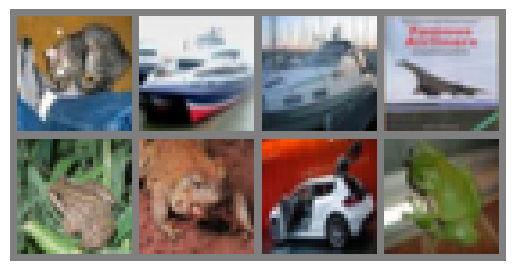

Predicted:  cat   truck automobile airplane frog  frog  automobile frog 


In [13]:
dataiter = iter(test_dataloader)
images, labels = next(dataiter)

imgshow(torchvision.utils.make_grid(images[:8], nrow=4))

model.eval()
outputs = model(images.to(device))
_, predicted = torch.max(outputs.data, 1)
print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(8)))

### Counting the trainable params in the CNN architecture:

In [14]:
def count_trainable_params(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

In [15]:
lenet_params = count_trainable_params(model)

print(f"The LeNet-5 model has {lenet_params} trainable params")

The LeNet-5 model has 62006 trainable params


Convolution lessens the parameters needed due to-
* Translation invariance - earlier layers treat the same patch similarly no matter where it appears on the image.
* Locality - the earlier layers focus on local regions. This local representations are aggregated to make predictions at whole image level.

The hidden units for MLP:
$$
H_j = \phi(\sum_i(w_{i,j}*x_i)+bias)
$$

For convolution operation, the immidiate hidden representation is a 2D tensor, given there's only a single channel. Unlike in MLP and Logistic Regression, where we had to flatten the input tensors, in CNN, the input 2D tensors can hold spatial information.

The hidden unit at location $(i,j)$ becomes:
$$
[H]_{i,j} = bias + \sum_a \sum_b [V]_{a,b} [X]_{i+a,j+b}
$$
where $[V]_{a,b}$ acts as the filter for the convolution operation.

Though the LeNet-5 architecture achieves similar accuracy as the MLP with 3 layers (~57%), the CNN architecture uses 50x less parameters. 

## Using Modified CNN architecture

In [16]:
from utils.model_architecture import mod_CNN
from utils.train import train_model

model_d = mod_CNN().to(device)
model_d = train_model(model_d, train_dataloader, val=val_dataloader, num_epochs=50, lr=1e-3)

Current LR: 0.001000
Epoch [1/50] - Train Loss: 1.5084, Train Acc: 45.35% - Val Loss: 1.3180, Val Acc: 53.06%
Current LR: 0.001000
Epoch [2/50] - Train Loss: 1.2014, Train Acc: 57.30% - Val Loss: 1.1755, Val Acc: 58.36%
Current LR: 0.001000
Epoch [3/50] - Train Loss: 1.0714, Train Acc: 62.27% - Val Loss: 1.0734, Val Acc: 61.54%
Current LR: 0.001000
Epoch [4/50] - Train Loss: 0.9760, Train Acc: 65.79% - Val Loss: 1.0088, Val Acc: 64.82%
Current LR: 0.001000
Epoch [5/50] - Train Loss: 0.9083, Train Acc: 68.37% - Val Loss: 1.0461, Val Acc: 63.72%
Current LR: 0.001000
Epoch [6/50] - Train Loss: 0.8456, Train Acc: 70.51% - Val Loss: 0.9630, Val Acc: 65.52%
Current LR: 0.001000
Epoch [7/50] - Train Loss: 0.7914, Train Acc: 72.44% - Val Loss: 0.8937, Val Acc: 67.68%
Current LR: 0.001000
Epoch [8/50] - Train Loss: 0.7432, Train Acc: 73.98% - Val Loss: 0.9068, Val Acc: 67.86%
Current LR: 0.001000
Epoch [9/50] - Train Loss: 0.7002, Train Acc: 75.35% - Val Loss: 0.9068, Val Acc: 68.32%
Current LR

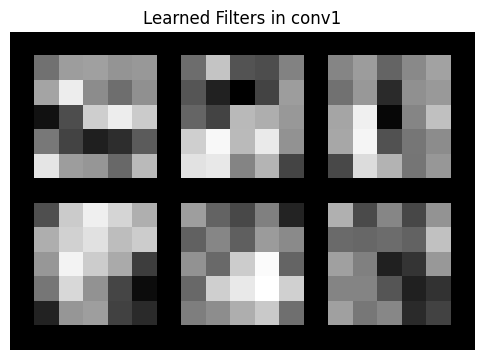

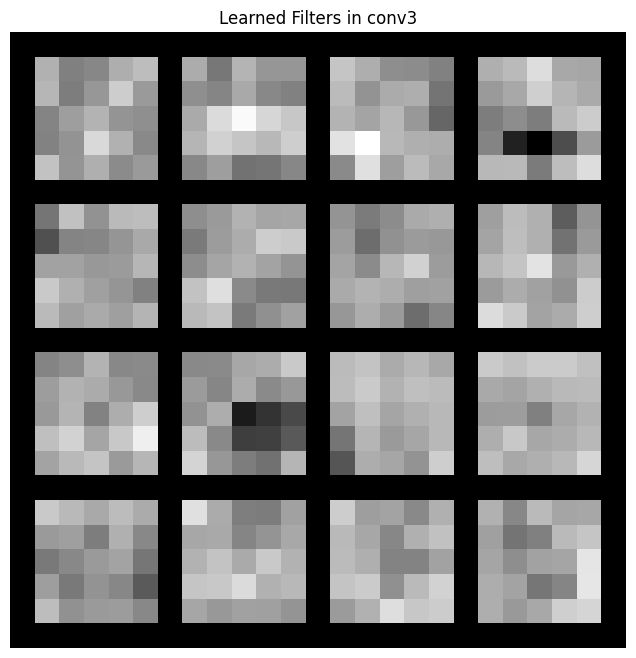

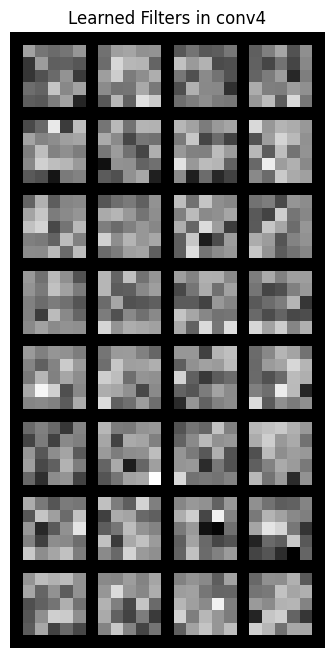

In [17]:
import matplotlib.pyplot as plt
import torchvision.utils as vutils

def plot_filters(filters, title, nrow=4, figsize=(8, 8)):
    # Only take the first channel of each filter: [out_channels, in_channels, H, W] -> [out_channels, 1, H, W]
    filters = filters[:, 0:1, :, :]
    filters = (filters - filters.min()) / (filters.max() - filters.min())  # Normalize to [0, 1]

    grid = vutils.make_grid(filters, nrow=nrow, padding=1, normalize=False)
    plt.figure(figsize=figsize)
    plt.imshow(grid.permute(1, 2, 0).squeeze(), cmap='gray')  # Grayscale plot
    plt.axis('off')
    plt.title(title)
    plt.show()

# Plot conv1
filters_d1 = model_d.conv1.weight.data.clone().cpu()
plot_filters(filters_d1, "Learned Filters in conv1", nrow=3, figsize=(6, 6))

# Plot conv3
filters_d3 = model_d.conv3.weight.data.clone().cpu()
plot_filters(filters_d3, "Learned Filters in conv3", nrow=4, figsize=(8, 8))

# Plot conv4
filters_d4 = model_d.conv4.weight.data.clone().cpu()
plot_filters(filters_d4, "Learned Filters in conv4", nrow=4, figsize=(8, 8))


This plot shows only the 1st channel of each convolution filters.
The kernels learn to detect low to high level features through training. 
* The early convolution layers (conv1) capture basic patterns like edges, colors or simple textures.
* The deeper layers (conv3, conv4) can detect more abstract features, like shapes, parts of objects, etc.

In [18]:
train_model(model_d, test_dataloader, train_flag=False, classes=classes, cls_acc=True)

Evaluation time: 0:00:12
Test Loss: 0.9198201946012533 & Accuracy: 70.98%
airplane       : 75.50% (755/1000)
automobile     : 84.30% (843/1000)
bird           : 60.70% (607/1000)
cat            : 55.90% (559/1000)
deer           : 65.60% (656/1000)
dog            : 53.60% (536/1000)
frog           : 77.20% (772/1000)
horse          : 75.40% (754/1000)
ship           : 81.90% (819/1000)
truck          : 79.70% (797/1000)


The modified model still struggles to detect images of cats, dogs and birds, whereas, it shows a higher probability of detecting ships, and automobiles.

In [19]:
mod_cnn_params = count_trainable_params(model_d)

print(f"The modified cnn model has {mod_cnn_params} trainable params")

The modified cnn model has 127858 trainable params


### Changes in the CNN architecture

* The activation function of the convolution block is ReLU instead of tanh. ReLU is better at tackling vanishing gradients and allows for faster training.
* The increased depth of the modified CNN (more convolutional layers) allow for the model to learn hierarchical features. So, the mod_CNN is better at generalising and capturing richer spatial features.
* Batch Normalization stabilizes training and can act as regulization.
* Dropout layer before the classification layer can help prevent overfitting, and generalize better.
* The use of padding better preseves spatial informations in earlier layers, especially the data from the boundary pixels that get filtered only once.
* More filters in the last convolution layer (32 vs 16) increases the capacity to learn more features. But it also increases the params.
* Using dilation increases the receptive field by inserting holes in the kernel, hence, avoid using larger kernel size. Though it decreases spatial resolution loss, it also increases the computational loss. Mostly used to aggregate context over a wide area without losing feature maps. On the contrary, pooling loses spatial details due to downsampling.

## Depthwise Separable Convolution

Separates the convolution into two parts-
* Depthwise convolution: single filter per input channel
* Pointwise convolution: uses 1x1 convolution tocombine those outputs

Depthwise convolution significantly reduces the number of required params and computations. Hence it's a good baseline lightweight model (MobileNetV2) for faster training and inference.

In [20]:
from utils.model_architecture import mod_CNN_depthwise

model_depth = mod_CNN_depthwise().to(device)
model_depth = train_model(model_depth, train_dataloader, val=val_dataloader, num_epochs=50, lr=1e-3)

Current LR: 0.001000
Epoch [1/50] - Train Loss: 1.6731, Train Acc: 38.65% - Val Loss: 1.4761, Val Acc: 46.30%
Current LR: 0.001000
Epoch [2/50] - Train Loss: 1.4237, Train Acc: 48.42% - Val Loss: 1.3675, Val Acc: 49.60%
Current LR: 0.001000
Epoch [3/50] - Train Loss: 1.3180, Train Acc: 52.87% - Val Loss: 1.3165, Val Acc: 53.30%
Current LR: 0.001000
Epoch [4/50] - Train Loss: 1.2342, Train Acc: 56.06% - Val Loss: 1.2452, Val Acc: 54.96%
Current LR: 0.001000
Epoch [5/50] - Train Loss: 1.1735, Train Acc: 58.51% - Val Loss: 1.2255, Val Acc: 55.80%
Current LR: 0.001000
Epoch [6/50] - Train Loss: 1.1250, Train Acc: 60.06% - Val Loss: 1.2146, Val Acc: 56.56%
Current LR: 0.001000
Epoch [7/50] - Train Loss: 1.0811, Train Acc: 61.98% - Val Loss: 1.1904, Val Acc: 57.20%
Current LR: 0.001000
Epoch [8/50] - Train Loss: 1.0402, Train Acc: 63.31% - Val Loss: 1.2231, Val Acc: 56.48%
Current LR: 0.001000
Epoch [9/50] - Train Loss: 1.0015, Train Acc: 64.42% - Val Loss: 1.2016, Val Acc: 58.42%
Current LR

In [21]:
train_model(model_depth, test_dataloader, train_flag=False, classes=classes, cls_acc=True)

Evaluation time: 0:00:08
Test Loss: 1.1705476102555634 & Accuracy: 61.36%
airplane       : 70.30% (703/1000)
automobile     : 73.40% (734/1000)
bird           : 49.50% (495/1000)
cat            : 37.40% (374/1000)
deer           : 50.50% (505/1000)
dog            : 54.20% (542/1000)
frog           : 72.40% (724/1000)
horse          : 68.90% (689/1000)
ship           : 71.50% (715/1000)
truck          : 65.50% (655/1000)


In [22]:
dwise_mod_cnn_params = count_trainable_params(model_depth)

print(f"The Depthwise Separable modified CNN model has {dwise_mod_cnn_params} trainable params")

The Depthwise Separable modified CNN model has 109196 trainable params


Using Depthwise Separable convolution has decreased the number of trainable params as well as the training and inference time. However, it has underperformed in terms of loss and accuracy compared to the modified CNN with the same number of layers. The performance may be improved through increasing layers and/or the use of residual blocks (like intResNets) by improving gradient flow and preventing degradation.

Residual blocks include skip connections that bypass one or more layers via a shortcut connection, which helps in mitigating the vanishing gradient problem. This is achieved by learning the residual mapping instead of the original mapping. 
The output becomes $$out = f(x) + x$$
(GeeksforGeeks)

In [23]:
from utils.model_architecture import mod_CNN_depth_res

model_res = mod_CNN_depth_res().to(device)
model_res = train_model(model_res, train_dataloader, val=val_dataloader, num_epochs=50, lr=1e-3)

Current LR: 0.001000
Epoch [1/50] - Train Loss: 1.6814, Train Acc: 38.17% - Val Loss: 1.4637, Val Acc: 47.28%
Current LR: 0.001000
Epoch [2/50] - Train Loss: 1.3979, Train Acc: 49.60% - Val Loss: 1.3184, Val Acc: 52.84%
Current LR: 0.001000
Epoch [3/50] - Train Loss: 1.2653, Train Acc: 55.10% - Val Loss: 1.2186, Val Acc: 56.54%
Current LR: 0.001000
Epoch [4/50] - Train Loss: 1.1562, Train Acc: 59.37% - Val Loss: 1.2521, Val Acc: 55.44%
Current LR: 0.001000
Epoch [5/50] - Train Loss: 1.0801, Train Acc: 62.14% - Val Loss: 1.0895, Val Acc: 60.68%
Current LR: 0.001000
Epoch [6/50] - Train Loss: 1.0120, Train Acc: 64.65% - Val Loss: 1.0912, Val Acc: 61.18%
Current LR: 0.001000
Epoch [7/50] - Train Loss: 0.9576, Train Acc: 66.50% - Val Loss: 1.0821, Val Acc: 61.96%
Current LR: 0.001000
Epoch [8/50] - Train Loss: 0.9049, Train Acc: 68.34% - Val Loss: 1.0250, Val Acc: 63.72%
Current LR: 0.001000
Epoch [9/50] - Train Loss: 0.8615, Train Acc: 70.12% - Val Loss: 1.0653, Val Acc: 63.78%
Current LR

In [24]:
train_model(model_res, test_dataloader, train_flag=False, classes=classes, cls_acc=True)

Evaluation time: 0:00:09
Test Loss: 1.1084169954251333 & Accuracy: 67.13%
airplane       : 72.00% (720/1000)
automobile     : 78.80% (788/1000)
bird           : 52.20% (522/1000)
cat            : 47.50% (475/1000)
deer           : 61.00% (610/1000)
dog            : 57.30% (573/1000)
frog           : 78.00% (780/1000)
horse          : 72.10% (721/1000)
ship           : 77.60% (776/1000)
truck          : 74.80% (748/1000)


In [25]:
res_mod_cnn_params = count_trainable_params(model_res)

print(f"The Depthwise Separable modified CNN model with Residual Block has {res_mod_cnn_params} trainable params")

The Depthwise Separable modified CNN model with Residual Block has 235868 trainable params


The residual blocks increased the performance while not hugely increasing the parameter numbers.